<a href="https://colab.research.google.com/github/beliabaez/CE888_2020/blob/master/Assignment2/Assignment2_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score as AUC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import StratifiedKFold as SKF
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

from zipfile import ZipFile
import json
import os
from pandas.io.json import json_normalize
from sklearn.dummy import DummyRegressor, DummyClassifier

In [0]:
api_token = {"username":"beliabaez","key":"d4473f0ec98ad5610b99d9c67e64ecb7"}
from google.colab import files
os.environ['KAGGLE_USERNAME'] = "beliabaez" # username from the json file
os.environ['KAGGLE_KEY'] = "d4473f0ec98ad5610b99d9c67e64ecb7" # key from the json file

In [7]:
#House Prices: Advanced Regression Techniques
!kaggle competitions download -c house-prices-advanced-regression-techniques
!mkdir housePrice/
!mv train.csv.zip housePrice/
!mv test.csv.zip housePrice/
!unzip housePrice/train.csv.zip -d housePrice
!unzip housePrice/test.csv.zip -d housePrice

  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 10.9MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 64.0MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 60.5MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 28.6MB/s]
mkdir: cannot create directory ‘housePrice/’: File exists
mv: cannot stat 'train.csv.zip': No such file or directory
mv: cannot stat 'test.csv.zip': No such file or directory
unzip:  cannot find or open housePrice/train.csv.zip, housePrice/train.csv.zip.zip or housePrice/train.csv.zip.ZIP.
unzip:  cannot find or open housePrice/test.csv.zip, housePrice/test.csv.zip.zip or housePrice/test.csv.zip.ZIP.


## **Train Data**

In [47]:
#train of House Prices
train_house= pd.read_csv('/content/housePrice/train.csv')
train_house.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
print("Nan values in Train set is " ,train_house.isnull().sum().sum())

Nan values in Train set is  6965


In [11]:
train_house.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here

In [0]:
def fillData (dataframe):
  dataframe["Alley"] = dataframe["Alley"].fillna("None")
  dataframe["FireplaceQu"] = dataframe["FireplaceQu"].fillna("None")
  dataframe["PoolQC"] = dataframe["PoolQC"].fillna("None")
  dataframe["Fence"] = dataframe["Fence"].fillna("None")
  dataframe["MiscFeature"] = dataframe["MiscFeature"].fillna("None")

In [62]:
#Fill blank columns according to data_description from kaggle competition

fillData(testhouse)
test_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,...,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,...,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,...,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,...,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,...,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,3,4,1,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,1,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,2,0.0,3,4,2,2,3,3,5,0,5,0,953,953,1,...,1,4,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,5,1,1999.0,1,2,460,4,4,2,0,40,0,0,0,0,3,4,1,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,1,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,3,119.0,3,4,1,2,3,3,0,790,4,163,589,1542,1,...,1,4,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,5,1,1978.0,2,2,500,4,4,2,349,0,0,0,0,0,3,2,1,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,1,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,2,0.0,0,2,4,3,1,3,2,275,5,0,877,1152,1,...,1,4,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,2,1,1941.0,1,1,252,4,4,2,0,60,0,0,0,0,3,0,3,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,1,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,2,0.0,3,4,1,3,3,2,2,49,4,1029,0,1078,1,...,1,0,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,3,1,1950.0,2,1,240,4,4,2,366,0,112,0,0,0,3,4,1,0,4,2010,8,4,142125


In [0]:

def LabelEncod(dataframe):
  for feature in dataframe.columns:
        if (dataframe[feature].dtype == 'object'):
            mode = dataframe[feature].mode()[0]
            temp = dataframe[feature].fillna(mode)
            le = LabelEncoder()
            dataframe[feature] = le.fit_transform(temp)

        else:
            dataframe[feature].fillna(np.mean(dataframe[feature]), inplace=True)

In [145]:
LabelEncod(train_house)

train_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,new,set
0,1,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,...,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,3,4,1,0,2,2008,8,4,208500,1,1
1,2,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,...,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,3,4,1,0,5,2007,8,4,181500,1,1
2,3,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,...,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,3,4,1,0,9,2008,8,4,223500,1,1
3,4,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,...,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,3,4,1,0,2,2006,8,0,140000,1,1
4,5,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,...,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,3,4,1,0,12,2008,8,4,250000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,1,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,2,0.0,3,4,2,2,3,3,5,0,5,0,953,953,1,...,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,5,1,1999.0,1,2,460,4,4,2,0,40,0,0,0,0,3,4,1,0,8,2007,8,4,175000,1,1
1456,1457,20,3,85.0,13175,1,1,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,3,119.0,3,4,1,2,3,3,0,790,4,163,589,1542,1,...,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,5,1,1978.0,2,2,500,4,4,2,349,0,0,0,0,0,3,2,1,0,2,2010,8,4,210000,1,1
1457,1458,70,3,66.0,9042,1,1,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,2,0.0,0,2,4,3,1,3,2,275,5,0,877,1152,1,...,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,2,1,1941.0,1,1,252,4,4,2,0,60,0,0,0,0,3,0,3,2500,5,2010,8,4,266500,1,1
1458,1459,20,3,68.0,9717,1,1,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,2,0.0,3,4,1,3,3,2,2,49,4,1029,0,1078,1,...,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,3,1,1950.0,2,1,240,4,4,2,366,0,112,0,0,0,3,4,1,0,4,2010,8,4,142125,1,1


In [61]:
print("Nan values in Train set is " ,train_house.isnull().sum().sum())

Nan values in Train set is  0


## **Test Data**

In [66]:
#test of House Prices
test_house = pd.read_csv('/content/housePrice/test.csv')
test_house


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [91]:
#Fill blank columns according to data_description from kaggle competition

fillData(test_house)
test_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,new
0,1461,20,2,80.0,11622,1,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,...,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,3,1,1961.000000,2,1.0,730.0,3,4,2,140,0,0,0,120,0,2,2,1,0,6,2010,8,4,1
1,1462,20,3,81.0,14267,1,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,...,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,3,1,1958.000000,2,1.0,312.0,3,4,2,393,36,0,0,0,0,2,4,0,12500,6,2010,8,4,1
2,1463,60,3,74.0,13830,1,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,...,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,5,1,1997.000000,0,2.0,482.0,3,4,2,212,34,0,0,0,0,2,2,1,0,3,2010,8,4,1
3,1464,60,3,78.0,9978,1,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,...,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,2,1,1998.000000,0,2.0,470.0,3,4,2,360,36,0,0,0,0,2,4,1,0,6,2010,8,4,1
4,1465,120,3,43.0,5005,1,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,...,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,3,1,1992.000000,1,2.0,506.0,3,4,2,0,82,0,0,144,0,2,4,1,0,1,2010,8,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,21.0,1936,1,1,3,3,0,4,0,10,2,2,3,4,4,7,1970,1970,1,0,5,5,2,0.0,3,4,1,3,3,3,5,0.0,5,0.0,546.0,546.0,0,...,1,3,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,6,0,3,1,1977.721217,2,0.0,0.0,3,4,2,0,0,0,0,0,0,2,4,1,0,6,2006,8,4,1
1455,2916,160,4,21.0,1894,1,1,3,3,0,4,0,10,2,2,4,4,4,5,1970,1970,1,0,5,5,2,0.0,3,4,1,3,3,3,4,252.0,5,0.0,294.0,546.0,0,...,1,3,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,6,0,3,4,1970.000000,2,1.0,286.0,3,4,2,0,24,0,0,0,0,2,4,1,0,4,2006,8,0,1
1456,2917,20,3,160.0,20000,1,1,3,3,0,4,0,11,2,2,0,2,5,7,1960,1996,1,0,10,12,2,0.0,3,4,1,3,3,3,0,1224.0,5,0.0,0.0,1224.0,0,...,1,3,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,6,1,5,5,1960.000000,2,2.0,576.0,3,4,2,474,0,0,0,0,0,2,4,1,0,9,2006,8,0,1
1457,2918,85,3,62.0,10441,1,1,3,3,0,4,0,11,2,2,0,5,5,5,1992,1992,1,0,6,14,2,0.0,3,4,2,2,3,0,2,337.0,5,0.0,575.0,912.0,0,...,1,3,970,0,0,970,0.0,1.0,1,0,3,1,3,6,6,0,3,1,1977.721217,2,0.0,0.0,3,4,2,80,32,0,0,0,0,2,2,3,700,7,2006,8,4,1


In [146]:
LabelEncod(test_house)

test_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,new,set
0,1461,20,2,80.0,11622,1,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,...,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,3,1,1961.000000,2,1.0,730.0,3,4,2,140,0,0,0,120,0,2,2,1,0,6,2010,8,4,0,0
1,1462,20,3,81.0,14267,1,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,...,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,3,1,1958.000000,2,1.0,312.0,3,4,2,393,36,0,0,0,0,2,4,0,12500,6,2010,8,4,0,0
2,1463,60,3,74.0,13830,1,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,...,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,5,1,1997.000000,0,2.0,482.0,3,4,2,212,34,0,0,0,0,2,2,1,0,3,2010,8,4,0,0
3,1464,60,3,78.0,9978,1,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,...,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,2,1,1998.000000,0,2.0,470.0,3,4,2,360,36,0,0,0,0,2,4,1,0,6,2010,8,4,0,0
4,1465,120,3,43.0,5005,1,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,...,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,3,1,1992.000000,1,2.0,506.0,3,4,2,0,82,0,0,144,0,2,4,1,0,1,2010,8,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,21.0,1936,1,1,3,3,0,4,0,10,2,2,3,4,4,7,1970,1970,1,0,5,5,2,0.0,3,4,1,3,3,3,5,0.0,5,0.0,546.0,546.0,0,...,3,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,6,0,3,1,1977.721217,2,0.0,0.0,3,4,2,0,0,0,0,0,0,2,4,1,0,6,2006,8,4,0,0
1455,2916,160,4,21.0,1894,1,1,3,3,0,4,0,10,2,2,4,4,4,5,1970,1970,1,0,5,5,2,0.0,3,4,1,3,3,3,4,252.0,5,0.0,294.0,546.0,0,...,3,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,6,0,3,4,1970.000000,2,1.0,286.0,3,4,2,0,24,0,0,0,0,2,4,1,0,4,2006,8,0,0,0
1456,2917,20,3,160.0,20000,1,1,3,3,0,4,0,11,2,2,0,2,5,7,1960,1996,1,0,10,12,2,0.0,3,4,1,3,3,3,0,1224.0,5,0.0,0.0,1224.0,0,...,3,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,6,1,5,5,1960.000000,2,2.0,576.0,3,4,2,474,0,0,0,0,0,2,4,1,0,9,2006,8,0,0,0
1457,2918,85,3,62.0,10441,1,1,3,3,0,4,0,11,2,2,0,5,5,5,1992,1992,1,0,6,14,2,0.0,3,4,2,2,3,0,2,337.0,5,0.0,575.0,912.0,0,...,3,970,0,0,970,0.0,1.0,1,0,3,1,3,6,6,0,3,1,1977.721217,2,0.0,0.0,3,4,2,80,32,0,0,0,0,2,2,3,700,7,2006,8,4,0,0


In [69]:
print("Nan values in Train set is " ,train_house.isnull().sum().sum())

Nan values in Train set is  0


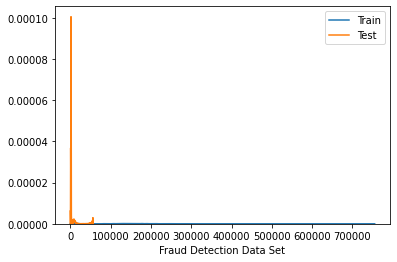

In [70]:
#plot of histogram for House Prices
x = train_house
y = test_house
sns.distplot(x,hist=False, label='Train', axlabel= 'House Prices Data Set')
sns.distplot(y, hist = False, label = 'Test')

# **SVM**

Divide the trainset and testset into x and y and apply the SVM Classifier with linear kernel

In [0]:

y1 = train_house['SalePrice']
x1 = train_house.drop(['SalePrice'], axis =1)

xtest = test_house
ytest = test_house


In [0]:

#Create a svm Classifier
clf = SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets

clf.fit(x1, y1)

y_prediction = clf.predict(xtest)

In [197]:
y_prediction

array([146800, 151500, 201800, ..., 223000,  64500, 274300])

In [0]:
df = pd.DataFrame({"Id" : test_house['Id'], "SalePrice" : y_prediction})
df.to_csv("predictionHouse2.csv", index=False)

After uploading it on Kaggle in https://www.kaggle.com/c/house-prices-advanced-regression-techniques/submit, **the predictions of sales prices** were of 0.43278

# Covriate shift adaptation

Using the training a discriminative method

In [0]:
train1 = train_house
test1 = test_house

In [0]:
train1['new'] = 0
test1['new'] = 1

combinedData = train1.append(test1)
X = combinedData.drop(columns=['set'], axis=1)
y = combinedData['set']

In [224]:
    clf = RFC()
    # clf = SVC(probability=True)
    predictions = np.zeros(y.shape)
    skf = SKF(n_splits=20, shuffle=True, random_state=1234)

    for kfold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print('Training discriminator model for fold {}'.format(kfold))
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        nanX_test = np.isnan(X_test)
        nany_train = np.isnan(y_train)
        nanX_train = np.isnan(X_train)
        X_train = ~nanX_train
        y_train = ~nany_train
        X_test = ~nanX_test 
        clf.fit(X_train, y_train)
        probs = clf.predict_proba(X_test)[:1]
        predictions[test_idx] = probs

    all_weights = np.exp(predictions)*len(train1)/len(test1)
    tr_weights = all_weights[:len(train1)]

Training discriminator model for fold 0
Training discriminator model for fold 1
Training discriminator model for fold 2
Training discriminator model for fold 3
Training discriminator model for fold 4
Training discriminator model for fold 5
Training discriminator model for fold 6
Training discriminator model for fold 7
Training discriminator model for fold 8
Training discriminator model for fold 9
Training discriminator model for fold 10
Training discriminator model for fold 11
Training discriminator model for fold 12
Training discriminator model for fold 13
Training discriminator model for fold 14
Training discriminator model for fold 15
Training discriminator model for fold 16
Training discriminator model for fold 17
Training discriminator model for fold 18
Training discriminator model for fold 19


In [225]:
print ('ROC-AUC for X and Z distributions: ', AUC(labels,predictions))


ROC-AUC for X and Z distributions:  0.5


In [226]:
tr_weights

array([2.72014494, 2.72014494, 2.72014494, ..., 2.72014494, 2.72014494,
       2.72014494])

In [0]:
clf = RFC()
clf.fit(x1,y1,sample_weight=tr_weights)
y_prediction = clf.predict(xtest)

In [231]:
y_prediction

array([129000, 151500, 210000, ..., 144000,  84500, 240000])

In [0]:
df = pd.DataFrame({"Id" : test_house['Id'], "SalePrice" : y_prediction})
df.to_csv("predictionHouse5.csv", index=False)

After uploading it on Kaggle in https://www.kaggle.com/c/house-prices-advanced-regression-techniques/submit, **the predictions of sales prices** were of 0.341